# Day 6
#### E1

<Axes: >

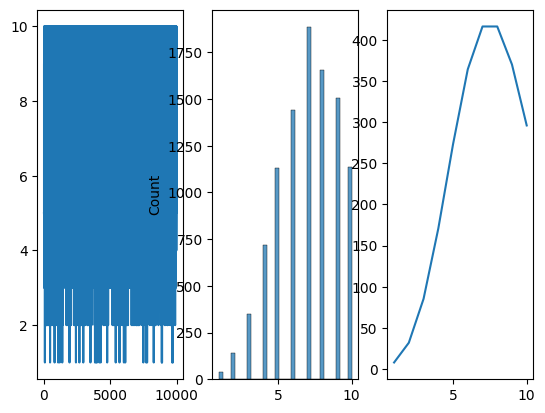

In [630]:
%reset -f
import numpy as np, scipy, math, seaborn as sns
import matplotlib.pyplot as plt
from icecream import ic
# Setting the parameters from E4
mean_service_time = 8
mean_time_btw_customers = 1
l = mean_time_btw_customers
s = mean_service_time
A =  l * s
m = 10

# The funciton to simulate
g = lambda i: (A**i)/ math.factorial(i)

x_old = 5 # initial value
x_list = [x_old]
i_list = [0]

n = 10_000
for i in range(1, n+1):
    x_new = np.random.randint(low=1, high=m+1)
    a = g(x_new)/g(x_old)
    u = np.random.uniform()
    # Accepting or rejecting the new value
    if u <= a:
        x_old = x_new
    x_list.append(x_old)
    i_list.append(i)

fig, ax = plt.subplots(1,3)
sns.lineplot(x=i_list, y=x_list, ax=ax[0])
sns.histplot(x_list, ax=ax[1])

# Plotting the values to see the distribution
i = np.arange(1,m+1)
y = (A**i)/ np.array(list(map(math.factorial, i)))
sns.lineplot(x=i, y=y, ax=ax[2])


In [631]:
# testing the dist with chi-square test
# Binning the distribution
random_numbers = x_list
(bins, binby) = np.histogram(random_numbers, bins=list(range(0, m+1)))

# The ideal numbers to compare against
bins_ideal = y/(sum(y)) # expected percent values
bins = bins/sum(bins)

# Calculate test-statistic
sum = 0
for observed, expected in zip(bins, bins_ideal):
    sum += (observed - expected)**2 /  \
        expected
T = sum
ic(T)


# Testing
m = 0
df = len(bins) - 1 - m 
ic(1 - scipy.stats.chi2.cdf(x = T, df = df))

# Based on this the two distributions are equal (p=0.999)

ic| T: 0.2384467275531038


ic| 1 - scipy.stats.chi2.cdf(x = T, df = df): 0.9999987908597942


0.9999987908597942

#### E2

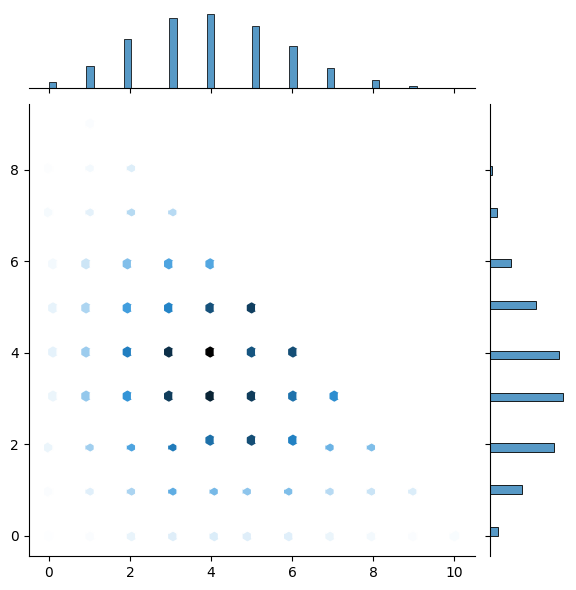

In [632]:

%reset -f
import numpy as np, scipy, math, seaborn as sns
import matplotlib.pyplot as plt
from icecream import ic
# Setting the parameters from E4
A =  4
m = 10

# The funciton to simulate
# In this case it takes two values instead of one
g = lambda i,j : ((A**i)/ math.factorial(i)) * ((A**j)/ math.factorial(j))

x_old = [1,2] # initial value
x_list1 = [x_old[0]]
x_list2 = [x_old[1]]
i_list = [0]

n = 10_000
for i in range(1, n+1):
    x_new = [np.nan,np.nan]
    x_new[0] = np.random.randint(size=1, low=0, high=m+1)[0]
    x_new[1] = np.random.randint(size=1, low=0, high=m+1-x_new[0])[0]

    a = g(x_new[0], x_new[1])/g(x_old[0], x_old[1])
    u = np.random.uniform()
    # Accepting or rejecting the new value
    if u <= a:
        x_old = x_new
    x_list1.append(x_old[0])
    x_list2.append(x_old[1])
    i_list.append(i)

# Plotting the distribution
sns.jointplot(x=x_list1, y=x_list2, kind="hex")
# In this case we can see the values in 2d.
# And we can see that the methods works with
# several values

In [633]:
from scipy.stats import chisquare
# defining method to test distributions with two variables
def test_two_chi2(x_arr, y_arr, g):
    def count_target(x_arr, y_arr, x_target, y_target):
        # Count the numbers which match the target
        count = 0
        for x, y in zip(x_arr, y_arr):
            if x == x_target and y == y_target:
                count += 1
        return count

    # Calculate expected for each combination and the found
    x = np.arange(0, 10+1)
    first, second = np.meshgrid(x,x)
    expected = []
    target = []
    for f,s in zip(first.flatten(), second.flatten()):
        if f + s <= 10: 
            expected.append(g(f,s))
            target.append(count_target(x_arr, y_arr, f, s))

    expected = np.array(expected)
    target = np.array(target)

    # Converting to propabilities
    expected = (expected/sum(expected)) * sum(target)

    # Calculating the statistic
    total = 0
    for observed, expec in zip(target, expected):
        total += (observed - expec)**2 /  \
            expec
    T = total

    # And testing the statistic
    m = 0
    df = len(target) - 1 - m  

    ic(1 - scipy.stats.chi2.cdf(x = T, df = df), T)

# Testing the distribution fit 
x_arr = np.array(x_list1)
y_arr = np.array(x_list2)
test_two_chi2(x_arr, y_arr, g)
# As can be seen it seems to not follow the distribution
# Meaning that we might have made a mistake somewhere 


ic| 1 - scipy.stats.chi2.cdf(x = T, df = df): 0.0
    T: 1128.2263712680224


b)

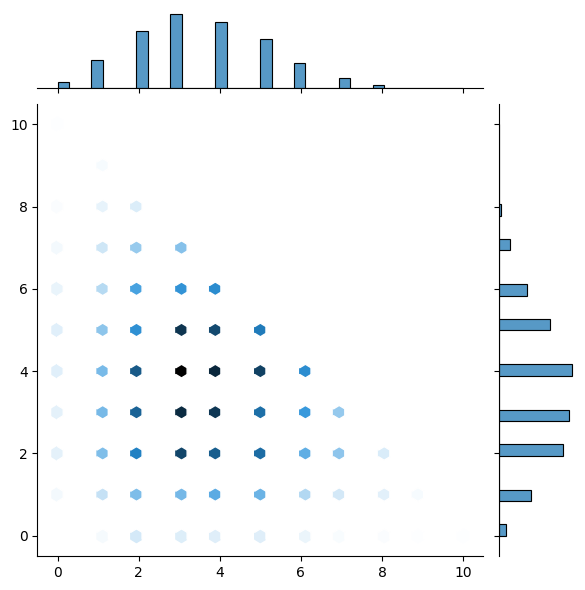

In [634]:
## Coordinatewise implementation
# It swaps between each coordinate on each
# iteration

import numpy as np, scipy, math, seaborn as sns
import matplotlib.pyplot as plt
from icecream import ic
# Setting the parameters from E4
A =  4
m = 10

# The funciton to simulate
# In this case it takes two values instead of one, as  before
g = lambda i,j : ((A**i)/ math.factorial(i)) * ((A**j)/ math.factorial(j))

# initial values
x_old = [1,2] # initial value
x_list1 = [x_old[0]]
x_list2 = [x_old[1]]
i_list = [0]

left_direction = False

n = 10
n = 10_000
for i in range(1, n+1):

    # Only take a step in either direction
    # Implemented by keeping either old value:
    if left_direction:
        # Only generate one random number
        x_new = np.random.randint(size=1, low=0, high=m+1-x_old[1])
        x_new = x_new[0]
        x_new = [x_new, x_old[1]]
        left_direction = False
    else: 
        # Only generate one random number
        x_new = np.random.randint(size=1, low=0, high=m+1-x_old[0])
        x_new = x_new[0]
        x_new = [x_old[0], x_new]
        left_direction = True
    a = g(x_new[0], x_new[1])/g(x_old[0], x_old[1])

    u = np.random.uniform()
    # Accepting or rejecting the new value
    if u <= a:
        x_old = x_new
    x_list1.append(x_old[0])
    x_list2.append(x_old[1])
    i_list.append(i)

# Plotting the distribution
sns.jointplot(x=x_list1, y=x_list2, kind="hex")

# In this case the results seems simmilar as above
# Although this time we only need to draw 1 new random number
# As the possible candidate instead of 2 as in the previous method.
# The method is therefore less computational intensive! 

In [635]:
# Testing the distribution fit 
x_arr = np.array(x_list1)
y_arr = np.array(x_list2)
test_two_chi2(x_arr, y_arr, g)
# As can be seen it seems to not follow the distribution
# Meaning that we might have made a mistake somewhere again
# Posible with the chi2 implementation

ic| 1 - scipy.stats.chi2.cdf(x = T, df = df): 0.00042944020082025247
    T: 109.84638769139812


c) Gibbs sampling


Firstly we need to find the conditionaly distributions $P(i|j)$ and $P(j|i)$: \
Here finding $P(i|j)$ is sufficient as $P(j|i)$ will be the same with j and i swapped:
$$
P(i|j) = \frac{P(i,j)}{P(j)} = \frac{ c \cdot \frac{A_1^i}{i!} \frac{A_2^j}{j!}  } 
{\sum_{k=0}^{m-j} c \cdot \frac{A_1^k}{k!} \frac{A_2^j}{j!}   }
= 
\frac{ \frac{A_1^i}{i!} \frac{A_2^j}{j!}  } 
{\frac{A_1^j}{j!} \sum_{k=0}^{m-j}  \frac{A_1^k}{k!}   }
=
\frac{ \frac{A_2^i}{i!}  } 
{\sum_{k=0}^{m-j}  \frac{A_1^k}{k!}   }
$$




In [636]:
import numpy as np, scipy, math, seaborn as sns
import matplotlib.pyplot as plt
from icecream import ic
# Setting the parameters from E4
A =  4
m = 10

# The conditional distribution p(i|j) implemented as g(), as described above 
# (and p(j|i) implemented when given the arguments in the reverse order)
f = lambda i: ((A**i)/ math.factorial(i))
def g(i, j):
    out = f(i) / sum([f(k) for k in list(range(m+1-j))])
    return out


# Now define a function to sample from the conditional distribution
def sample_g(j):
    x = list(range(0, 11-j))
    y = np.array([g(i,j) for i in x])
    out = np.random.choice(x, p=y/(sum(y)))
    return out


ic| 1 - scipy.stats.chi2.cdf(x = T, df = df): 0.0, T: 8439.40230583918


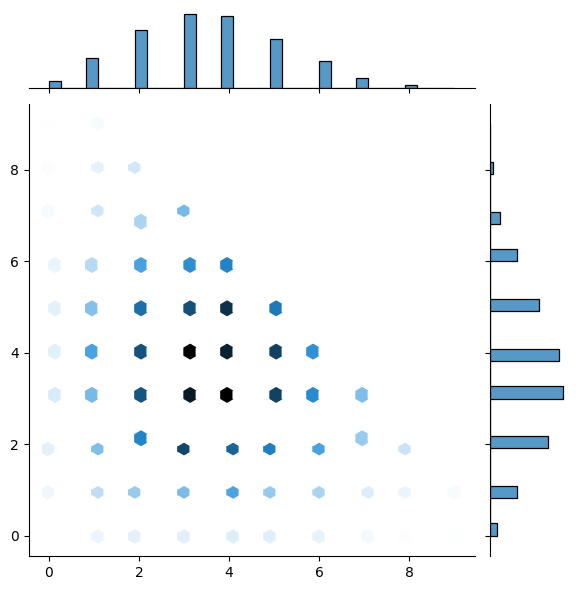

In [637]:
# Initial values
i = 4
j = 2
x_list1 = [i]
x_list2 = [j]
i_list = [0]

n = 10_000
for step in range(1, n+1):

    # Sample p(j|i)
    j = sample_g(i)

    # Sample p(i|j)
    i = sample_g(j)

    x_list1.append(i)
    x_list2.append(j)
    i_list.append(step)


# Plotting the distribution
sns.jointplot(x=x_list1, y=x_list2, kind="hex")
# Testing the distribution fit 
x_arr = np.array(x_list1)
y_arr = np.array(x_list2)
test_two_chi2(x_arr, y_arr, g)
# Again it seems to not follow the prober distribution :/